---
title: "Data Exploration"
format:
  html:
    page-layout: full
    code-fold: show
    code-copy: true
    code-tools: true
    code-overflow: wrap
---

In the Exploratory Data Analysis (EDA) section, we leverage the capabilities of R, complemented by the ggplot2 package, to perform an in-depth exploration of the dataset. EDA encompasses various crucial components, including Data Understanding, which lays the groundwork for grasping the dataset's characteristics and structure. Descriptive Statistics provide a concise summary and quantitative description of the dataset's main features. Data Visualization is employed to represent the data graphically, ensuring a clear and intuitive understanding of the underlying patterns and trends. Correlation Analysis is conducted to discern the relationships and dependencies between different variables. Hypothesis Generation allows us to formulate assumptions and predictions based on the observed patterns, guiding further investigation. Lastly, Identifying Outliers is an essential step to detect and address any anomalous data points that might distort the analysis results. Together, these elements constitute a comprehensive EDA process, ensuring a robust foundation for subsequent analyses and decision-making.

## Data Understand

For this project, we are working with four distinct datasets. Our aim is to gain a comprehensive understanding of the characteristics associated with each feature, including their data types, relationships, and relevance to the project at hand. To achieve this, we will engage in Exploratory Data Analysis (EDA), which will enable us to delve deeper into the nuances of the datasets and extract valuable insights. To focus on EDA, we are only selecting one dataset.

In [9]:
library(tidyverse)
library(tidyquant)
library(ggplot2)
library(forecast)
library(astsa) 
library(xts)
library(tseries)
library(lubridate)
library(plotly)
library(dplyr)

#load df
ihe_df <- read.csv("cleaned_data/IHE.csv")

## Descriptive Statistics

Descriptive statistics involve computing and presenting fundamental summary metrics, including the mean, median, mode, standard deviation, and variance, specifically for numerical variables. To gain an initial understanding of the IHE stock market dataset, we can display its first few entries and subsequently delve into these summary statistics. In the case of categorical variables, bar charts prove to be an effective tool for visualizing the distribution of the data.

The IHE dataset comprises time-series data, presenting numerical information in a structured format. It is pertinent to note that this dataset specifically pertains to stock market data of IHE, spanning from October 2019 through October 2023.

In [17]:
head(ihe_df)

summary(ihe_df)

ihe_df$Date = as.Date(ihe_df$Date)

,Date,Open,High,Low,Close,Adj.Close,Volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2019-10-09,137.73,138.39,137.73,138.06,129.2299,7600
2,2019-10-10,137.73,138.54,137.73,138.06,129.2299,6300
3,2019-10-11,139.49,141.05,139.49,140.12,131.1581,19200
4,2019-10-14,139.72,140.37,139.72,139.79,130.8493,4500
5,2019-10-15,141.11,142.89,141.11,142.43,133.3204,193500
6,2019-10-16,142.80,143.90,142.80,142.98,133.8353,14200


     Date                Open            High            Low       
 Length:1006        Min.   :120.8   Min.   :122.0   Min.   :115.5  
 Class :character   1st Qu.:166.1   1st Qu.:167.1   1st Qu.:165.0  
 Mode  :character   Median :180.5   Median :181.4   Median :179.7  
                    Mean   :176.2   Mean   :177.2   Mean   :175.2  
                    3rd Qu.:187.3   3rd Qu.:188.2   3rd Qu.:186.4  
                    Max.   :201.7   Max.   :202.8   Max.   :201.1  
     Close         Adj.Close         Volume      
 Min.   :117.0   Min.   :109.9   Min.   :  1200  
 1st Qu.:166.0   1st Qu.:157.2   1st Qu.:  3900  
 Median :180.7   Median :175.7   Median :  6100  
 Mean   :176.2   Mean   :170.1   Mean   : 11116  
 3rd Qu.:187.3   3rd Qu.:182.7   3rd Qu.: 11200  
 Max.   :201.8   Max.   :196.2   Max.   :227600  

The summary of basic statistics provided above showcases a comprehensive range of measures including the minimum, first quartile, median, mean, third quartile, and maximum values. The dataset encompasses a variety of stock-related information, covering aspects such as date, opening and closing prices, lowest and highest prices, adjusted closing price, and the volume of stocks traded. Upon examination of the dataset, it is evident that the stock-related data is entirely numerical in nature, which leads us to conclude that there are no categorical variables present in this particular dataset.

## Data Visualization

By leveraging visualizations like histograms, box plots, scatter plots, and line plots, we can conduct a thorough exploration of the data's distribution, the interrelationships between variables, and any potential patterns or trends that may emerge. Specifically, in our scenario, we are examining time series data related to the stock market. Consequently, we are utilizing line plots, and potentially lag plots as well, to delve into correlations and gain deeper insights.

The stock market data from IHE are sequential, constituting a time series. Thus, it is imperative to confirm that the dataset remains stationary. Following this, in the Naive Bayes section, we will proceed to partition the data into training and testing sets. This step is crucial as it enables us to validate the model's performance and ensure its reliability for subsequent in-depth analysis.

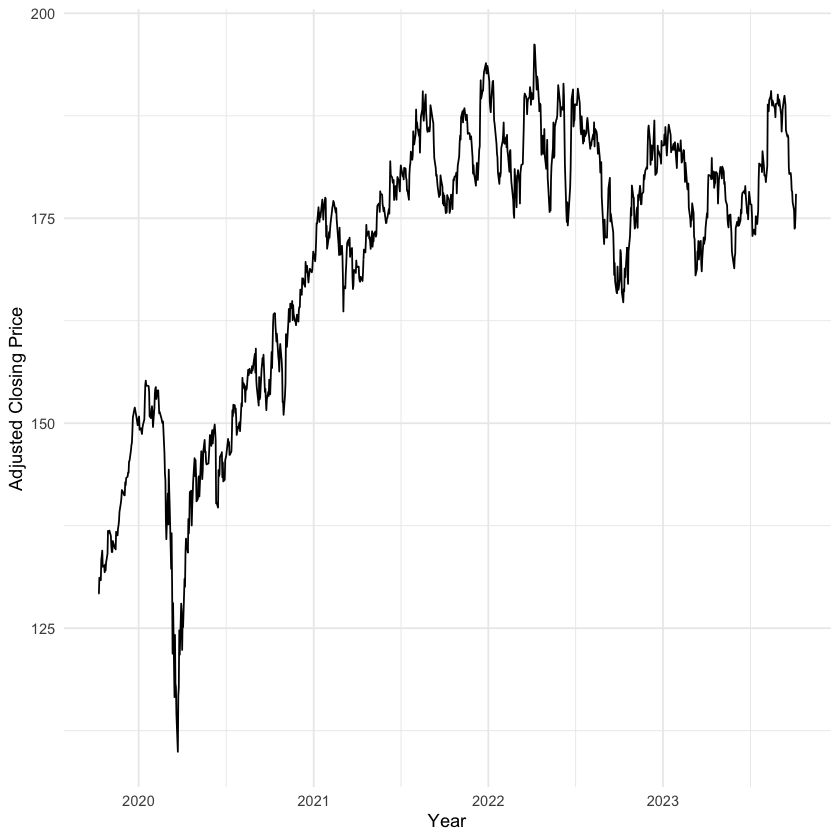

In [18]:
ihe_plot = ggplot(ihe_df, aes(x=Date))+ geom_line(aes(y=Adj.Close))+ xlab("Year")+ ylab("Adjusted Closing Price")+ theme_minimal()
ihe_plot

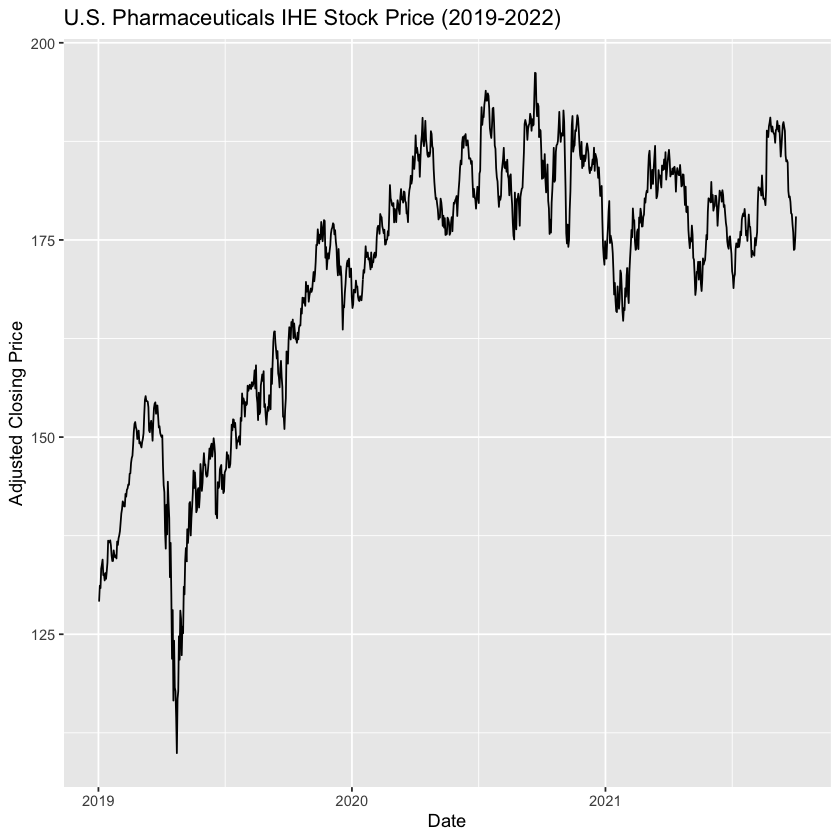

In [24]:
ihe.ts = subset(ihe_df, select = Adj.Close)

ihe.ts = ts(ihe.ts, start=c(2019,1),frequency = 365.25) #per day for stock market price

autoplot(ihe.ts, main = "U.S. Pharmaceuticals IHE Stock Price (2019-2022)", xlab = "Date", ylab = "Adjusted Closing Price")

You may consider employing the decomposition method to unveil the seasonality present within your dataset. To enhance the quality of your analysis, you might also explore differencing or detrending techniques to achieve stationarity in the data.

## Identifying Outliers

Examining the decomposition plot enables us to identify any outliers present in the dataset. However, as illustrated by the plot below, there are no outliers detected in this particular dataset.


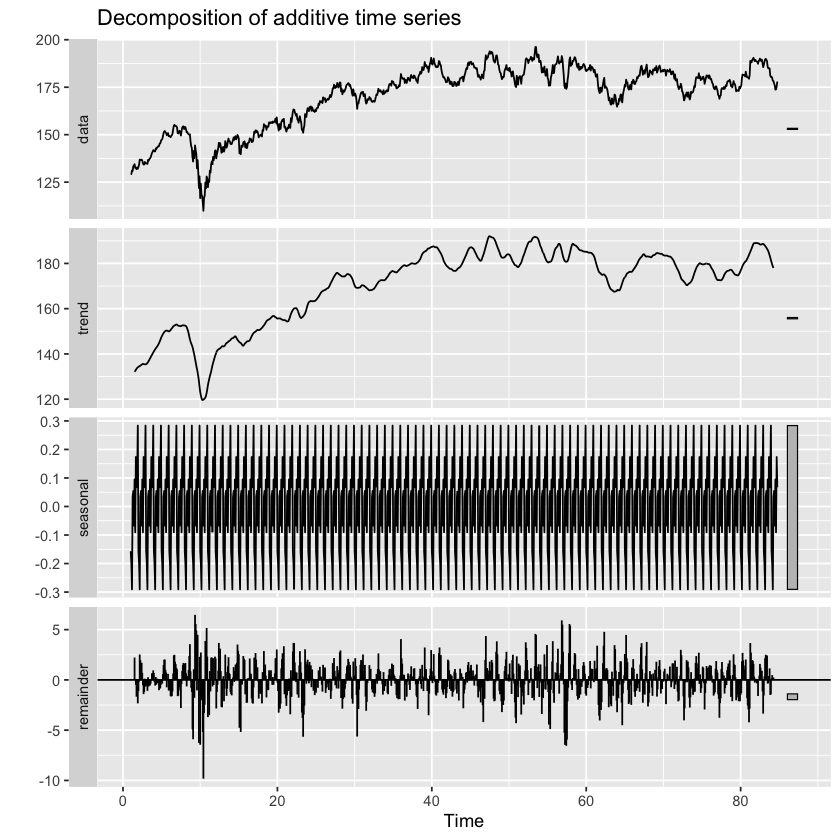

In [26]:
additive_ihe = ts(ihe.ts, frequency = 12)
decompose_ihe = decompose(additive_ihe, "additive")
autoplot(decompose_ihe)

Upon observation, it is evident that there are rising trends and potential seasonality present in the data. Moving forward, our next step is to examine the lag plot to assess autocorrelation, as well as the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots to aid in model selection. Utilizing the ACF and PACF plots will not only assist us in identifying the appropriate model for subsequent analysis but will also serve to verify the stationarity of the data.

## Correlation Analysis

Investigate the relationships among variables with the use of gglagplot() function to assess autocorrelation in the context of stock market data. The results obtained indicate a unanimous positive correlation across all considered variables.


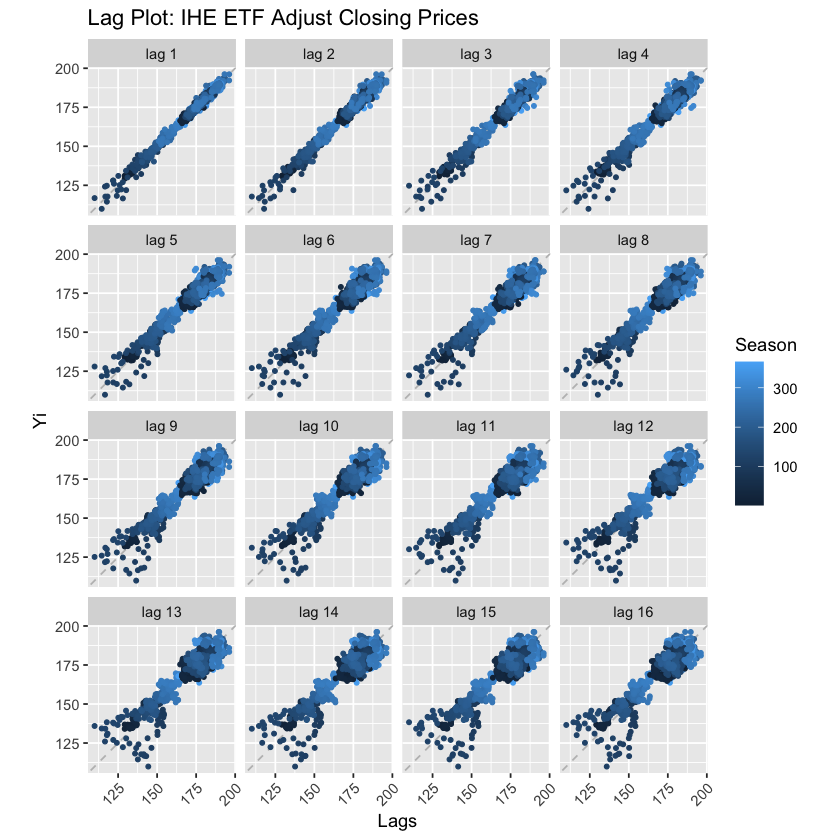

In [80]:
gglagplot(ihe.ts, do.lines = FALSE) + xlab("Lags") + ylab("Yi") + ggtitle("Lag Plot: IHE ETF Adjust Closing Prices") + theme(axis.text.x = element_text(angle=45, hjust = 1))

## ACF and PACF 

Warning message in ggplot2::geom_segment(lineend = "butt", ...):
“Ignoring unknown parameters: `main`”
Warning message in ggplot2::geom_segment(lineend = "butt", ...):
“Ignoring unknown parameters: `main`”


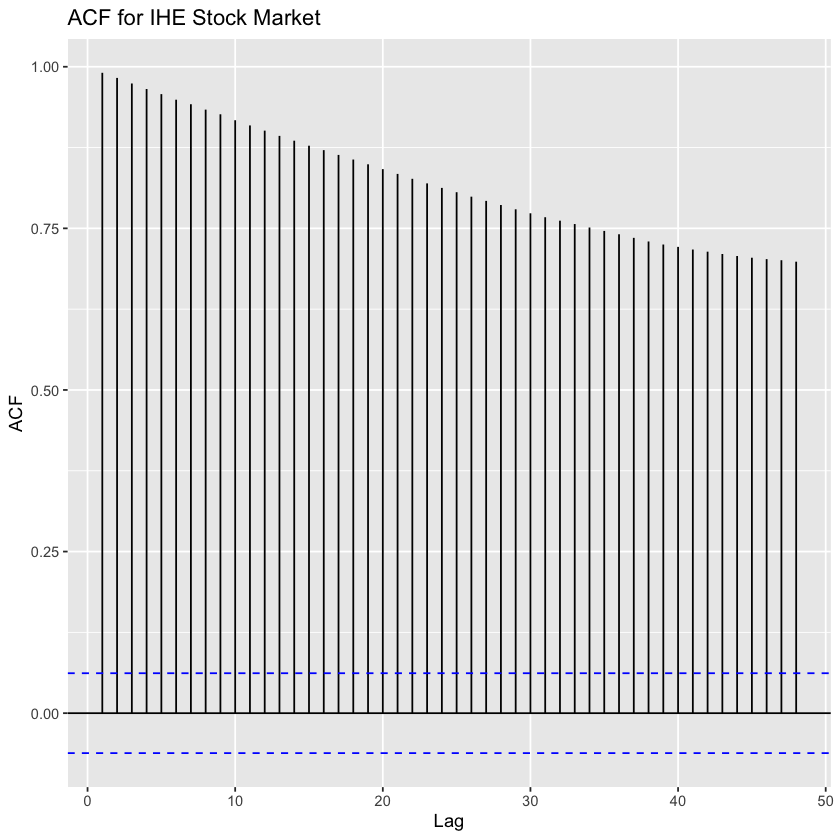

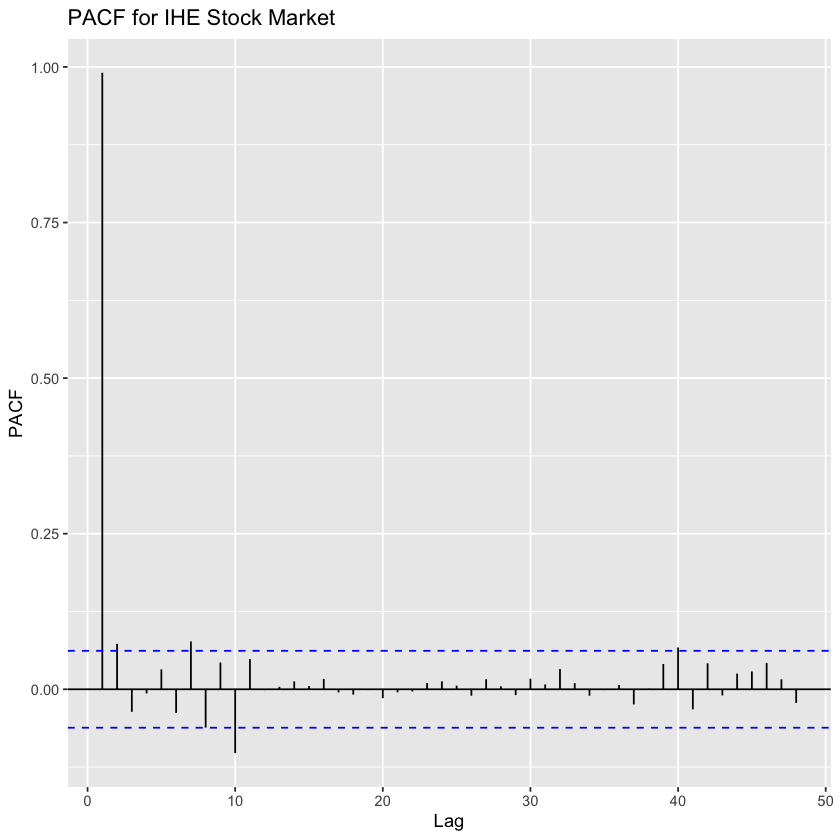

In [79]:
ggAcf(ihe.ts, 48, main="ACF for IHE Stock Market")
ggPacf(ihe.ts, 48, main="PACF for IHE Stock Market")

The dataset evidently lacks stationarity, a claim substantiated by the Augmented Dickey-Fuller (ADF) test results, affirming the necessity to proceed with differencing the dataset for further analysis.

## Hypothesis Generation

Hypothesis Test:

$H_o$: Data has unit roots; hence the series is not stationary

$H_a$: Data does not have unit roots; hence the series is stationary

Decision: If p-value is smaller than $\alpha=0.05$ significance level, we reject $H_o$. If p=value is greater than $\alpha=0.05$ significance level, then we do not reject $H_o$.

In [28]:
tseries::adf.test(ihe.ts)


	Augmented Dickey-Fuller Test

data:  ihe.ts
Dickey-Fuller = -2.7192, Lag order = 10, p-value = 0.2739
alternative hypothesis: stationary


Conclusion: Since p-value from ADF test is 0.2739, we have not enough evidence to reject the null hypothesis $\alpha=0.05$ significance level. Thus, the time series is not stationary. We can differencing the dataset to fix this issue. 

## ACF and PACF
ACF (AutoCorrelation Function) and PACF (Partial AutoCorrelation Function) plots, when applied to data that has undergone first-order differencing, serve as valuable tools in ascertaining the stationarity of the dataset.

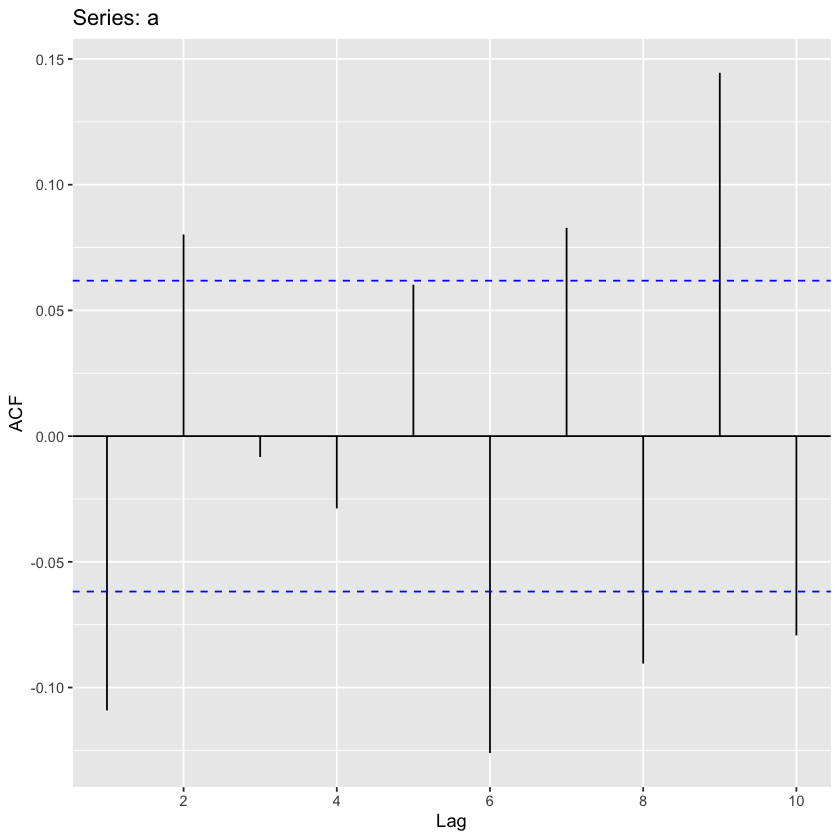

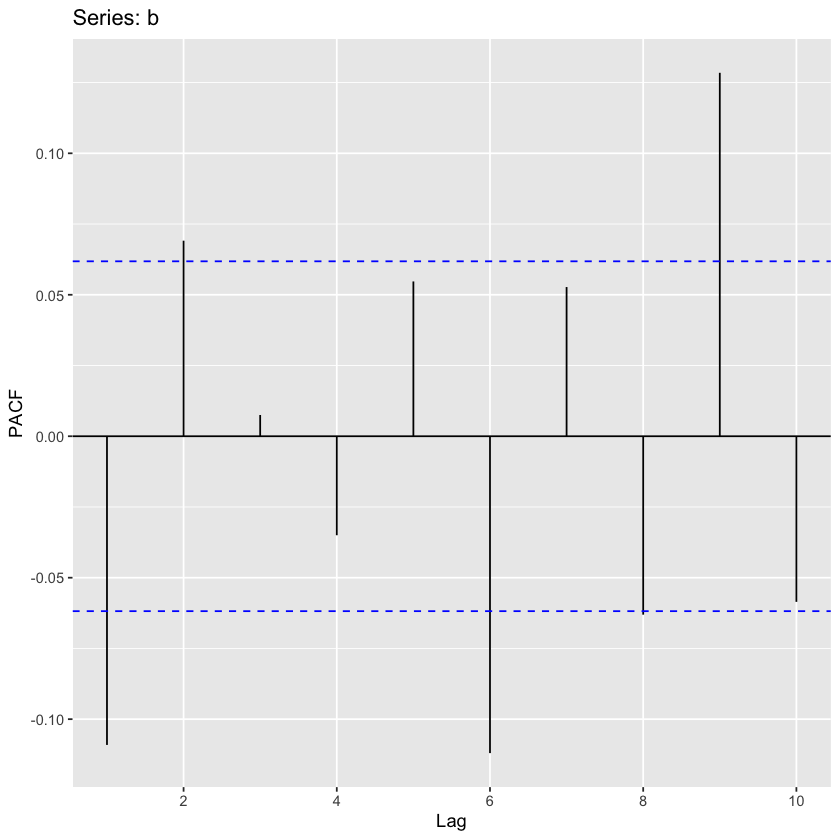

In [35]:
a <- ihe.ts %>% diff(difference=1, lag=1) 
ggAcf(a, 10)

b <- ihe.ts %>% diff(difference=1, lag=1) 
ggPacf(b, 10)

The ACF plot exhibits the strongest correlation at lags 1 and 2, suggesting that q should be set to either 1 or 2. Similarly, the PACF plot demonstrates optimal correlation at lags 1 and 2, indicating that p could be 1 or 2. Given that we have applied first differencing just once, we have d set to 1.

Now, our objective is to identify the most suitable model based on criteria such as AIC, BIC, and AICc, and subsequently, we will compare these results with the insights obtained from the ACF and PACF plots.

In [70]:
ihe.diff = diff(ihe.ts)

In [71]:
d=1
i=1
temp= data.frame()
ls=matrix(rep(NA,6*12),nrow=12) # roughly nrow = 4x3x1

#d is already defined and no need to run for loop
for (p in c(1,2)) {
  for(q in c(1,2))
    {
        
        if(p+d+q-1<=8) #usual threshold
        {
        
        model<- Arima(ihe.ts,order=c(p-1,d,q-1),include.drift=TRUE) 
        ls[i,]= c(p-1,d,q-1,model$aic,model$bic,model$aicc)
        i=i+1
        #print(i)
        
      }
    }
}

temp= as.data.frame(ls)
names(temp)= c("p","d","q","AIC","BIC","AICc")

#temp
knitr::kable(temp)

temp[which.min(temp$AIC),]
temp[which.min(temp$BIC),]
temp[which.min(temp$AICc),]



|  p|  d|  q|      AIC|      BIC|     AICc|
|--:|--:|--:|--------:|--------:|--------:|
|  0|  1|  0| 4154.424| 4164.249| 4154.436|
|  0|  1|  1| 4145.940| 4160.678| 4145.964|
|  1|  1|  0| 4144.380| 4159.118| 4144.404|
|  1|  1|  1| 4143.490| 4163.141| 4143.530|
| NA| NA| NA|       NA|       NA|       NA|
| NA| NA| NA|       NA|       NA|       NA|
| NA| NA| NA|       NA|       NA|       NA|
| NA| NA| NA|       NA|       NA|       NA|
| NA| NA| NA|       NA|       NA|       NA|
| NA| NA| NA|       NA|       NA|       NA|
| NA| NA| NA|       NA|       NA|       NA|
| NA| NA| NA|       NA|       NA|       NA|

,p,d,q,AIC,BIC,AICc
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,1,1,1,4143.49,4163.141,4143.53


,p,d,q,AIC,BIC,AICc
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,1,1,0,4144.38,4159.118,4144.404


,p,d,q,AIC,BIC,AICc
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,1,1,1,4143.49,4163.141,4143.53


The AIC and adjusted AIC favor the ARIMA(1,1,1) model, while the BIC indicates that ARIMA(1,1,0) is the preferable option for model selection. To discern the most suitable ARIMA model, we should conduct a thorough examination of the diagnostic metrics associated with each model.

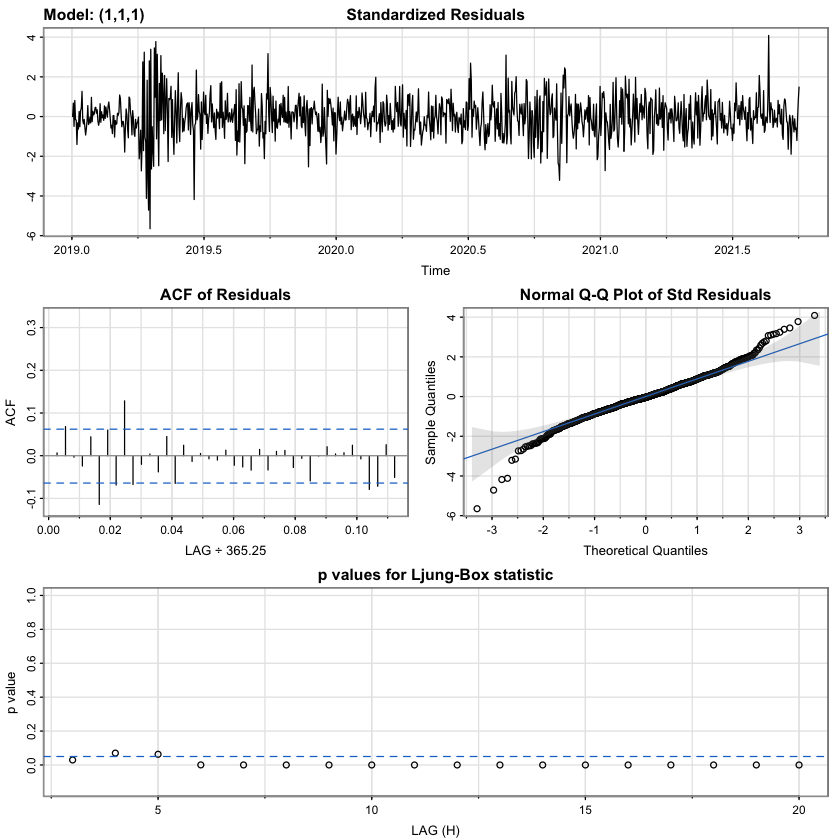

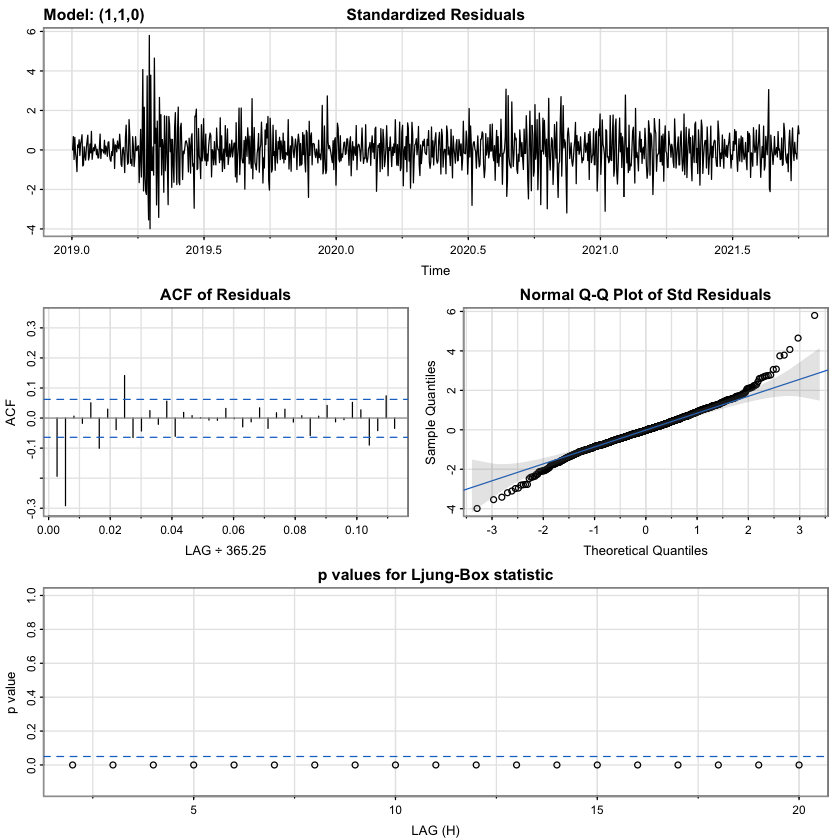

In [72]:
set.seed(123)

ihe.arima111 = capture.output(sarima(ihe.diff, 1,1,1))

ihe.arima110 = capture.output(sarima(ihe.diff, 1,1,0))

The ARIMA(1,1,1) model has proven to be more effective, prompting us to select it for our analysis. With this model in place, we are now well-equipped to proceed with forecasting.

In [73]:
cat(ihe.arima111[45:65], ihe.arima111[length(ihe.arima111)], sep = "\n")


sigma^2 estimated as 3.596:  log likelihood = -2070.62,  aic = 4149.25

$degrees_of_freedom
[1] 1001

$ttable
         Estimate     SE   t.value p.value
ar1       -0.1094 0.0314   -3.4838  0.0005
ma1       -1.0000 0.0028 -362.9830  0.0000
constant  -0.0002 0.0002   -1.0385  0.2993

$AIC
[1] 4.132718

$AICc
[1] 4.132741

$BIC
[1] 4.152286


